### 1.Aggregate Key Metrics

In [1]:
import pandas as pd
import numpy as np

# List of crypto files and names
coins = {
    'bitcoin': 'outputs/bitcoin_merged_sentiment.csv',
    'ethereum': 'outputs/ethereum_merged_sentiment.csv',
    'solana': 'outputs/solana_merged_sentiment.csv',
    'cardano': 'outputs/cardano_merged_sentiment.csv'
}

# Prepare a list to store metrics
metrics = []

# Calculate metrics for each coin
for coin, path in coins.items():
    df = pd.read_csv(path)
    avg_return = df['returns'].mean()
    volatility = df['returns'].std()
    avg_sentiment = df['fear_greed_score'].mean()
    
    metrics.append([coin, avg_return, volatility, avg_sentiment])

# Create DataFrame
metrics_df = pd.DataFrame(metrics, columns=['coin', 'avg_return', 'volatility', 'avg_sentiment'])
metrics_df.set_index('coin', inplace=True)
metrics_df


,avg_return,volatility,avg_sentiment
coin,,,
bitcoin,0.001704,0.026143,55.05
ethereum,0.000007,0.038671,55.05
solana,0.001341,0.045597,55.05
cardano,0.003152,0.061690,55.05


### 2.Scale the Features

In [4]:
#Use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(metrics_df)

### 3.Reduce Dimensions(PCA)

In [3]:
#This helps in visualizing clusters in 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

### 4.Perform Clustering (KMeans)

In [8]:
# Set the number of threads to 1 to avoid the memory leak:
# Add this before fitting your KMeans model:
import os
os.environ["OMP_NUM_THREADS"] = "1"


# We’ll use KMeans clustering with 2 or 3 clusters.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_data)
metrics_df['cluster'] = clusters


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 5.Plot Clusters

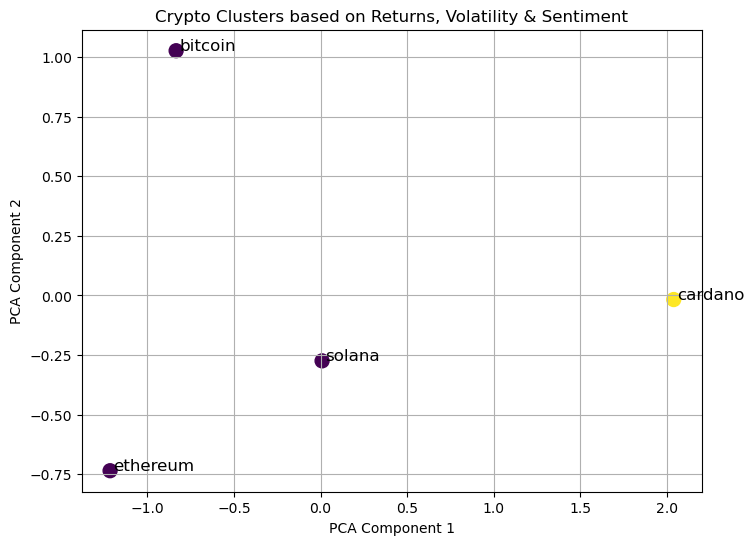

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=100)

for i, coin in enumerate(metrics_df.index):
    plt.text(pca_data[i, 0]+0.02, pca_data[i, 1], coin, fontsize=12)

plt.title("Crypto Clusters based on Returns, Volatility & Sentiment")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


### 6.Save Clustered Data

In [10]:
metrics_df.to_csv("outputs/crypto_clustered.csv")